In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data/Medicaldataset.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


In [27]:
df.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [28]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [24]:
df['Result'] = df.apply(lambda x: 1 if x["Result"] == "positive" else 0, axis = 1)

In [29]:
df.corr()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
Age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
Gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
Heart rate,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
Systolic blood pressure,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
Diastolic blood pressure,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
Blood sugar,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
CK-MB,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
Troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
Result,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

<Axes: >

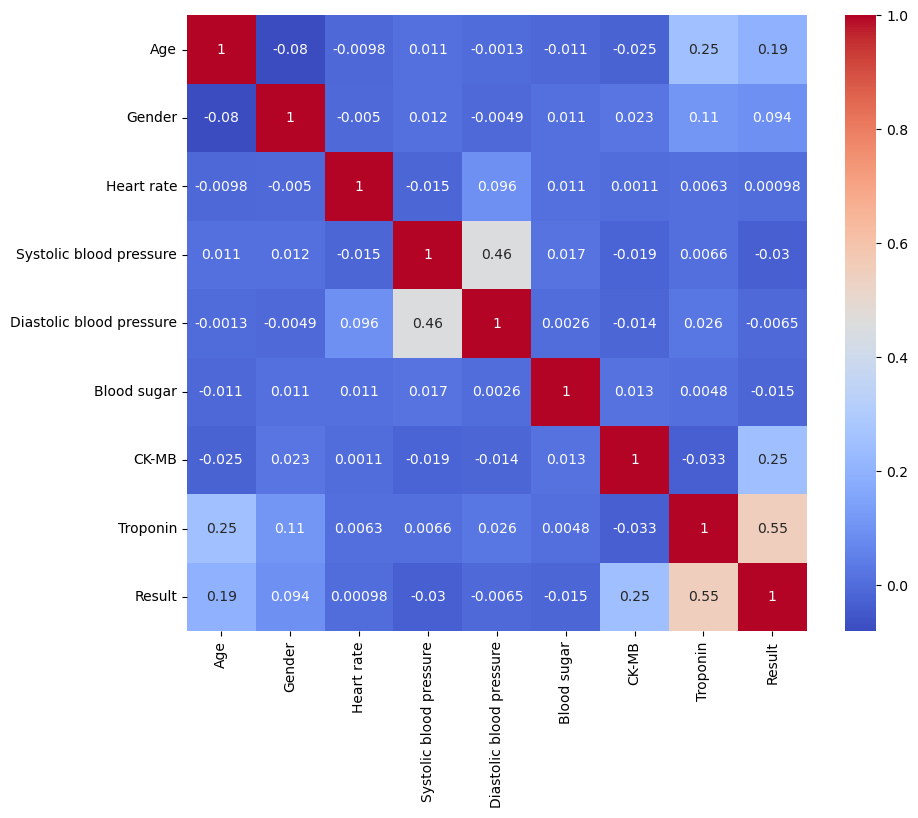

In [47]:
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
sns.heatmap(df.corr(method = 'kendall'), annot=True, cmap='coolwarm')

In [67]:
df = pd.read_csv('data/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


* Order: Observation number
* PID: Parcel identification number - can be used with city web site for parcel review.
* MS SubClass: Identifies the type of dwelling involved in the sale.
* MS Zoning: Identifies the general zoning classification of the sale.
* Lot Frontage: Linear feet of street connected to property
* Lot Area: Lot size in square feet
* Street: Type of road access to property
* Alley: Type of alley access to property
* Lot Shape: General shape of property
* Land Contour: Flatness of the property
* Utilities: Type of utilities available
* Lot Config: Lot configuration
* Land Slope: Slope of property
* Neighborhood: Physical locations within Ames city limits (map available)
* Condition 1: Proximity to various conditions
* Condition 2: Proximity to various conditions (if more than one is present)
* Bldg Type: Type of dwelling
* House Style: Style of dwelling
* Overall Qual: Rates the overall material and finish of the house
* Overall Cond: Rates the overall condition of the house
* Year Built: Original construction date
* Year Remod/Add: Remodel date (same as construction date if no remodeling or additions)
* Roof Style: Type of roof
* Roof Matl: Roof material
* Exterior 1: Exterior covering on house
* Exterior 2: Exterior covering on house (if more than one material)
* Mas Vnr Type: Masonry veneer type
* Mas Vnr Area: Masonry veneer area in square feet
* Exter Qual: Evaluates the quality of the material on the exterior
* Exter Cond: Evaluates the present condition of the material on the exterior
* Foundation: Type of foundation
* Bsmt Qual: Evaluates the height of the basement
* Bsmt Cond: Evaluates the general condition of the basement
* Bsmt Exposure: Refers to walkout or garden level walls
* BsmtFin Type 1: Rating of basement finished area
* BsmtFin SF 1: Type 1 finished square feet
* BsmtFinType 2: Rating of basement finished area (if multiple types)
* BsmtFin SF 2: Type 2 finished square feet
* Bsmt Unf SF: Unfinished square feet of basement area
* Total Bsmt SF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* Central Air: Central air conditioning
* Electrical: Electrical system
* 1st Flr SF: First Floor square feet
* 2nd Flr SF: Second floor square feet
* Low Qual Fin SF: Low quality finished square feet (all floors)
* Gr Liv Area: Above grade (ground) living area square feet
* Bsmt Full Bath: Basement full bathrooms
* Bsmt Half Bath: Basement half bathrooms
* Full Bath: Full bathrooms above grade
* Half Bath: Half baths above grade
* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen: Kitchens above grade
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality (Assume typical unless deductions are warranted)
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* Garage Type: Garage location
* Garage Yr Blt: Year garage was built
* Garage Finish: Interior finish of the garage
* Garage Cars: Size of garage in car capacity
* Garage Area: Size of garage in square feet
* Garage Qual: Garage quality
* Garage Cond: Garage condition
* Paved Drive: Paved driveway
* Wood Deck SF: Wood deck area in square feet
* Open Porch SF: Open porch area in square feet
* Enclosed Porch: Enclosed porch area in square feet
* 3-Ssn Porch: Three season porch area in square feet
* Screen Porch: Screen porch area in square feet
* Pool Area: Pool area in square feet
* Pool QC: Pool quality
* Fence: Fence quality
* Misc Feature: Miscellaneous feature not covered in other categories
* Misc Val: $Value of miscellaneous feature
* Mo Sold: Month Sold
* Yr Sold: Year Sold
* Sale Type: Type of sale
* Sale Condition: Condition of sale

In [68]:
df.isna().sum().sort_values(ascending = False).head(30)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
Paved Drive          0
Full Bath            0
Half Bath            0
dtype: int64

<Axes: xlabel='SalePrice', ylabel='Count'>

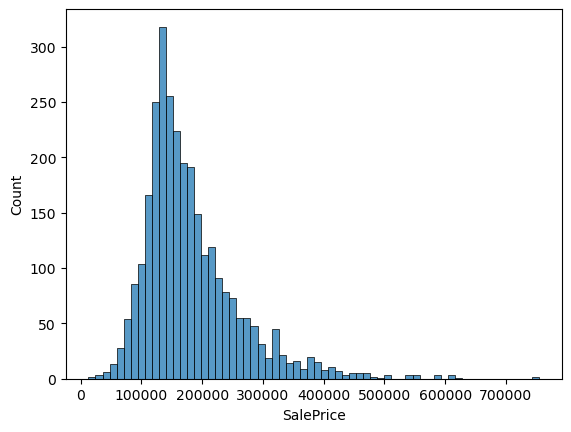

In [69]:
sns.histplot(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

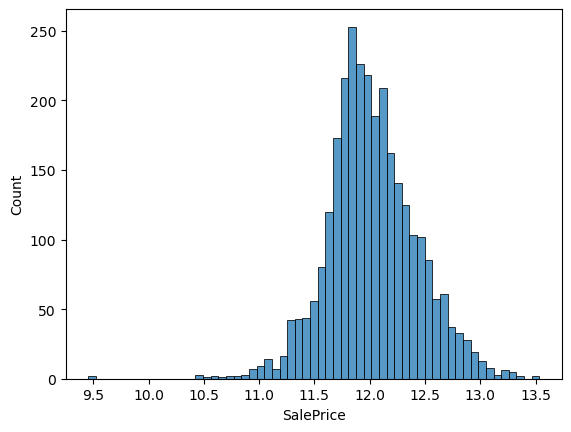

In [70]:
sns.histplot(np.log(df['SalePrice']))

In [71]:
df['Has Pool'] = df['Pool QC'].apply(lambda x: 0 if pd.isna(x) else 1)

In [72]:
df = df.drop(columns = ['Pool QC'])

In [73]:
df.isna().sum().sort_values(ascending = False).head(30)

Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Area          1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Paved Drive          0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
dtype: int64